# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [1]:
import os
from src.utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode 
from tqdm import tqdm
import torch 
import matplotlib.pyplot as plt

#os.environ["CUDA_VISIBLE_DEVICES"] = "0"

if torch.cuda.is_available(): 
    gpu_device = 0  
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    
    device = torch.device("cpu")
    print("No GPU available, using CPU")


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Using GPU: NVIDIA GeForce RTX 3060


Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [2]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\Data\\abril.csv'



Carga el Dataset.

In [ ]:
train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

Crear la columna `feature_vector`, la cual se vectorizará para crear el espacio de usuarios.

In [3]:
train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

### Lanzar el recomendador. 

Si el programa no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab
Using GPU: NVIDIA GeForce RTX 3060
Initializing User Space
Directory 'c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\userspace_data' created or already exists.
[]
Models and Dataframes not found, initializing a Recommender System from zero.
Error creating directory: 'RecommenderSystem' object has no attribute 'model_save_directory'
Generating User Space
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.


Selecting strings from each user: 100%|██████████| 1846/1846 [00:19<00:00, 95.23it/s] 
Some weights of BertModel were not initialized from the model checkpoint at dccuchile/bert-base-spanish-wwm-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
testing clusters in elbow method: 100%|██████████| 45/45 [04:32<00:00,  6.06s/user]


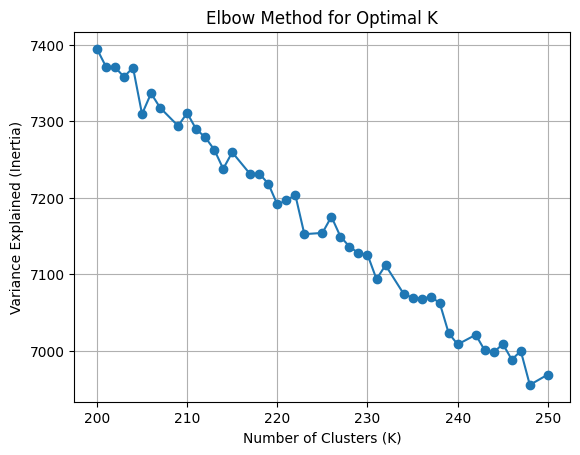

Optimal n_clusters is 205
Used AgglomerativeClustering() to clusterize.

Silhouette Scores:
Agglomerative Clustering: 0.33604568


c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


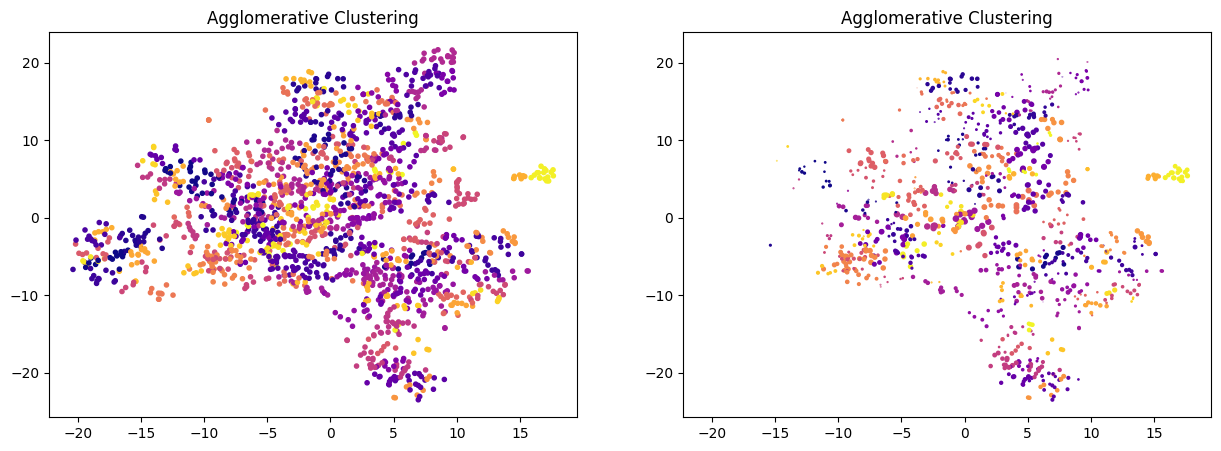

Exporting cluster model
Exporting clusters
Exporting vectorizer model
Done
Exporting vectorized corpus
Exporting vectorized corpus
Loaded cluster model
Loaded BERT_model
Loaded tokenizer
Loaded vectorized data
Loaded kmeans data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Loaded corpus data
Se han removido 72.83% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1846.
Se han removido 75.15% de taxnumberproviders, por tener < 10 licitaciones. 
 El numero de usuarios para crear el corpus será 1378.


In [6]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd())

### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [13]:
#seleccionamos un rut aleatorio para demostrar
ruts = test['taxnumberprovider'].sample(n =1) 

#llamamos a la función predict, la cual retorna el número de cluster al que pertenece y el dataframe de toda la data original más una columna de clusters
n_cluster,recomendation_set = RS.predict(ruts.values[0])

(96.972.190-2) data point belongs to cluster 187


Para obtener las recomendaciones, se puede ejecutar un query sobre el dataframe recomendation_set, filtrando por numero de cluster y removiendo las "autorecomendaciones", es decir, las recomendaciones que pertenecen al mismo usuario que está solicitando la recomendación.

In [23]:
filtered_recomendations = recomendation_set.query(f'Cluster == {n_cluster} and taxnumberprovider != "{ruts.values[0]}" ').head()

Se puede visualizar el resultado:

In [24]:
filtered_recomendations.head()

,organismosolicitante,agilebuyingscode,agilebuyingsdescription,agilebuyingsstatus,agilebuyingscurrency,agilebuyingsavailableamount,agileitemsname,agileitemsmp_id,agileitemsproductcategory,agileoffereditemsproductoofertado,agileoffereditemscategoriaofertada,agileoffereditemsdescripcionofertada,agileoffereditemspreciototal,taxnumberprovider,provideractivity,adjudicada,feature_vector_x,feature_vector_y,Cluster
2119,70.934.900-7,1274189-13-COT23,Se busca comprar diferentes materiales de escr...,OC Emitida,$,1000000.0,Lápiz pasta,44121701,"Equipos, accesorios y suministros de oficina /...",Lápiz pasta,Instrumentos de escritura,"Cajas de lápices de 50 unidades color azul, ma...",43240.0,77.329.985-4,"VENTA AL POR MENOR DE ARTICULOS DE PERFUMERIA,...",False,instrumentos de escritura cajas de lapices de ...,instrumentos de escritura caja de marcador de ...,187.0
2872,60.910.000-1,5424-28-COT23,Artículos de escritorio para el SEMDA de la Un...,OC Emitida,$,1000000.0,Portalápiz,44111509,"Equipos, accesorios y suministros de oficina /...",Portalápiz,Agendas y accesorios,Portalápiz metálico rejilla 10 cm.,7542.0,77.667.331-5,VENTA AL POR MAYOR DE ARTICULOS DE PAPELERIA Y...,False,agendas y accesorios portalapiz metalico rejil...,carpetas de archivo y separadores carpeta ofic...,187.0
2873,60.910.000-1,5424-28-COT23,Artículos de escritorio para el SEMDA de la Un...,OC Emitida,$,1000000.0,Clips para papel,44122104,"Equipos, accesorios y suministros de oficina /...",Clips para papel,Suministros de sujeción,Accoclips plásticos color blanco. Caja x 50 u.,11670.0,77.667.331-5,VENTA AL POR MAYOR DE ARTICULOS DE PAPELERIA Y...,False,suministros de sujecion accoclips plasticos co...,carpetas de archivo y separadores carpeta ofic...,187.0
3075,60.911.000-7,5067-643-COT23,Adquisición de Pad Mouse y Apoya Muñecas. Sólo...,OC Emitida,$,225000.0,Soportes para muñecas,46182206,"Equipos y suministros de defensa, orden públic...",Soportes para muñecas,"Equipos y suministros de defensa, orden públic...",Se adjunta cotización con detalle de productos...,166020.0,77.667.331-5,VENTA AL POR MAYOR DE ARTICULOS DE PAPELERIA Y...,False,"equipos y suministros de defensa, orden public...",carpetas de archivo y separadores carpeta ofic...,187.0
3386,69.220.601-0,3510-478-COT23,Cotizar productos con características solicitadas,OC Emitida,$,1800000.0,Distribuidores de pegamento o recambios,44121631,"Equipos, accesorios y suministros de oficina /...",Distribuidores de pegamento o recambios,Suministros de escritorio,Pegamento barra 40 gr equivalente Henkel,78250.0,77.667.331-5,VENTA AL POR MAYOR DE ARTICULOS DE PAPELERIA Y...,False,suministros de escritorio pegamento barra 40 g...,carpetas de archivo y separadores carpeta ofic...,187.0


In [27]:
#filtered_recomendations.groupby('taxnumberprovider').nunique()

### Métricas

In [11]:
RS.evaluate_users()

Processing RUTs: 100%|██████████| 1240/1240 [04:59<00:00,  4.14it/s]


In [20]:
display(RS.c)

,Cluster,self_precision_%,self_recall_%,self_f1-score_%,Licitaciones_calzadas,Total_participaciones_de_cada_rut_en_cluster,Cantidad_de_sugerencias_para_el_cluster,Cantidad_de_provedores_en_cluster,Peso_cluster,self_precision_ponderada_%,self_recall_ponderada_%,self_f1-score_ponderada_%
0,0,0.037522,0.746733,0.07061,12,1607,3554,14,0.011290,0.000424,0.008431,0.000797
1,1,0.091703,1.988813,0.173799,32,1609,10612,6,0.004839,0.000444,0.009623,0.000841
2,2,0.193461,0.773196,0.293112,18,2328,3710,11,0.008871,0.001716,0.006859,0.0026
3,3,0.0,0.0,0.0,0,519,749,9,0.007258,0.0,0.0,0.0
4,4,0.005635,0.5,0.011144,1,200,1331,4,0.003226,0.000018,0.001613,0.000036
...,...,...,...,...,...,...,...,...,...,...,...,...
190,199,0.0,0.0,0.0,0,764,828,3,0.002419,0.0,0.0,0.0
191,200,0.0,0.0,0.0,0,432,1610,7,0.005645,0.0,0.0,0.0
192,201,0.246914,1.960784,0.438596,1,51,135,2,0.001613,0.000398,0.003163,0.000707
193,203,0.190086,0.775194,0.305307,1,129,261,3,0.002419,0.00046,0.001875,0.000739


In [19]:
display(RS.d)

{'self_precision_porcentual_global': 0.0787033481681606,
 'self_recall_porcentual_global': 0.5829579528933571,
 'self_f1_score_porcentual_global': 0.11784436829550138,
 'total_participaciones_todos': 189020,
 'total_licitaciones_calzadas': 1785,
 'ratio_par_calz': 0.009443445138080627}

In [21]:
scores_table = RS.scores(train,test)

c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:262: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'xx'] = df['agileitemsmp_id'].str.slice(0, 2)
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:263: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'xxyy'] = df['agileitemsmp_id'].str.slice(0,4)
c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\src\utils\RecommenderSystem.py:262: SettingWithCopyWarning: 
A value is trying to be set

Media de la columna: 0.08313648028633905
Desviación estándar de la columna: 0.10475261852305853
Media de la columna: 0.08313648028633905
Desviación estándar de la columna: 0.10475261852305853
Se eliminaron 695 columnas en DataFrame 1
Se eliminaron 98 columnas en DataFrame 2



153/153 [==============================] - 0s 987us/step
Época 1/30 - Pérdida en entrenamiento: 31.0797, Pérdida en prueba: 39.1684, MAE: 4.2952
153/153 [==============================] - 0s 1ms/step
Época 2/30 - Pérdida en entrenamiento: 20.3731, Pérdida en prueba: 43.2349, MAE: 4.4417
153/153 [==============================] - 0s 990us/step
Época 3/30 - Pérdida en entrenamiento: 16.1923, Pérdida en prueba: 38.5941, MAE: 3.9086
153/153 [==============================] - 0s 954us/step
Época 4/30 - Pérdida en entrenamiento: 12.8343, Pérdida en prueba: 40.9528, MAE: 4.0370
153/153 [==============================] - 0s 1ms/step
Época 5/30 - Pérdida en entrenamiento: 11.0482, Pérdida en prueba: 41.4244, MAE: 4.0073
1

In [22]:
display(scores_table)

,score,rut,xx,xxyy
0,3.822519,10.232.710-1,42,4713
1,4.310262,10.232.710-1,43,4713
2,3.601925,10.232.710-1,44,4713
3,4.066924,10.232.710-1,47,4713
4,9.077757,10.232.710-1,50,4713
...,...,...,...,...
4871,7.262045,99.593.170-2,42,4214
4872,7.330831,99.593.170-2,42,4218
4873,6.911149,99.593.170-2,42,4222
4874,7.980834,99.593.170-2,42,4227
